In [2]:
#Importar librerías y carga de datasets

import pandas as pd
import matplotlib.pyplot as plt

empleados = pd.read_excel('/content/empleados_mensual2.xlsx')

In [3]:
#Calcular antiguedad por empleado

salidas = empleados.dropna(subset=['fecha_salida']).copy()

salidas['antiguedad_meses'] = (
    (pd.to_datetime(salidas['fecha_salida']) -
     pd.to_datetime(salidas['fecha_ingreso']))
    .dt.days / 30
)

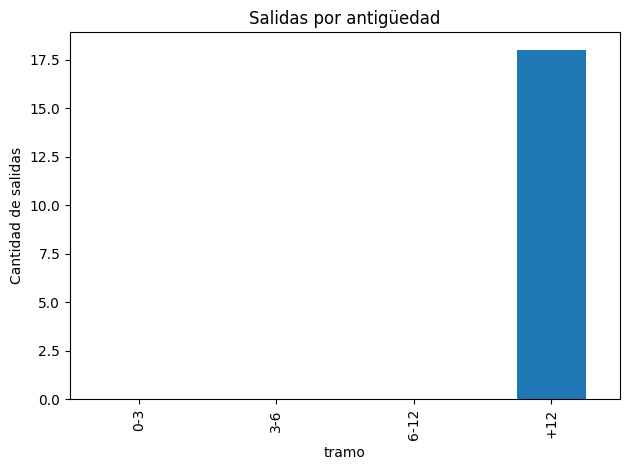

In [4]:
#Tramos de egreso y gráfico

bins = [0, 3, 6, 12, 120]
labels = ['0-3', '3-6', '6-12', '+12']
salidas['tramo'] = pd.cut(salidas['antiguedad_meses'], bins=bins, labels=labels)

conteo = salidas['tramo'].value_counts().sort_index()

conteo.plot(kind='bar')
plt.title('Salidas por antigüedad')
plt.ylabel('Cantidad de salidas')
plt.tight_layout()
plt.savefig('insight_1_rotacion.png', dpi=150)
plt.show()
